### Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import time 
import requests
from bs4 import BeautifulSoup

from wordcloud import WordCloud
from textblob import TextBlob

### Read in the Data

In [5]:
data_path = "data/BA_scrapped_data.csv"
df = pd.read_csv(data_path)

In [6]:
df

,Unnamed: 0,AuthorName,ReviewBody,RatingValue,RatingMax,ReviewTitle,DatePublished,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended
0,0,Jonathan Rodden,✅Trip Verified| Flew British Airways on BA 43...,9.0,10.0,"""flight itself was quite good""",2024-06-10,A320,Solo Leisure,Business Class,London to Amsterdam,May 2024,yes
1,1,A Hammad,✅Trip Verified| BA cancelled the flight from ...,1.0,10.0,"""You expect better from BA""",2024-06-09,NaN,Couple Leisure,Premium Economy,Tokyo to Manchester via London,May 2024,no
2,2,D Baker,✅Trip Verified| I strongly advise everyone to ...,1.0,10.0,"“never fly British Airways""",2024-06-06,Boeing 747,Business,Business Class,Heathrow to San Francisco,June 2024,no
3,3,Val Rose,✅Trip Verified| My partner and I were on the B...,5.0,10.0,“we will rethink BA moving forward”,2024-06-03,NaN,Couple Leisure,Business Class,Tampa to Gatwick,May 2024,no
4,4,Jason George,Not Verified| We had a Premium Economy return...,1.0,10.0,“extremely poor customer service”,2024-06-01,NaN,Family Leisure,Premium Economy,Los Angeles to London,January 2024,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,3804,Michael Dielissen,YYZ to LHR - July 2012 - I flew overnight in p...,8.0,10.0,British Airways customer review,2012-08-29,NaN,NaN,Premium Economy,NaN,NaN,yes
3805,3805,Nick Berry,LHR to HAM. Purser addresses all club passenge...,9.0,10.0,British Airways customer review,2012-08-28,NaN,NaN,Business Class,NaN,NaN,yes
3806,3806,Avril Barclay,My son who had worked for British Airways urge...,5.0,10.0,British Airways customer review,2011-10-12,NaN,NaN,Economy Class,NaN,NaN,yes
3807,3807,C Volz,London City-New York JFK via Shannon on A318 b...,4.0,10.0,British Airways customer review,2011-10-11,NaN,NaN,Premium Economy,NaN,NaN,no


### Data Cleaning 

#### 1. Summarising Mising Values:  
Counts the number of missing values in each column. Returns a Series with the count of missing values for each column. This helps in identifying which columns have missing data and how much, providing insights into data quality.

In [7]:
df.isna().sum()

Unnamed: 0              0
AuthorName              0
ReviewBody              0
RatingValue             5
RatingMax               5
ReviewTitle             0
DatePublished           0
Aircraft             1823
Type Of Traveller     771
Seat Type               2
Route                 775
Date Flown            778
Recommended             0
dtype: int64

#### 2. Cleaning the Dataframe by removing Missing Values

the code below removes all rows with any missing values and store the result in 'cleaned_df'.

In [8]:
cleaned_df = df.dropna()

####
verifying the missing values in the cleaned Dataframe !

In [9]:
cleaned_df.isna().sum()

Unnamed: 0           0
AuthorName           0
ReviewBody           0
RatingValue          0
RatingMax            0
ReviewTitle          0
DatePublished        0
Aircraft             0
Type Of Traveller    0
Seat Type            0
Route                0
Date Flown           0
Recommended          0
dtype: int64

### Summarising the Cleaned Dataframe

Providing a concise summaray of the cleaned Dataframe. Displays the number of entries, column names, non-null counts, and data types for each column in the dataframe. This helps in understanding the structure and completeness of the cleaned data.

In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 0 to 3031
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1978 non-null   int64  
 1   AuthorName         1978 non-null   object 
 2   ReviewBody         1978 non-null   object 
 3   RatingValue        1978 non-null   float64
 4   RatingMax          1978 non-null   float64
 5   ReviewTitle        1978 non-null   object 
 6   DatePublished      1978 non-null   object 
 7   Aircraft           1978 non-null   object 
 8   Type Of Traveller  1978 non-null   object 
 9   Seat Type          1978 non-null   object 
 10  Route              1978 non-null   object 
 11  Date Flown         1978 non-null   object 
 12  Recommended        1978 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 216.3+ KB


#### Converting Data types

converting the data types of the 'Rating' and 'RatingMax' to numeric. This is important for ensuring that these columns contain numerical data, which is necessary for subsequent analysis or calculations. 

In [11]:
cleaned_df.loc[:, ['RatingValue', 'RatingMax']] = cleaned_df[['RatingValue', 'RatingMax']].apply(pd.to_numeric, errors='coerce')

#### Removing Duplicates

In [12]:
cleaned_df = cleaned_df.drop_duplicates()

#### Handling Date Formats
1. convert 'DatePublished' to data time format

In [13]:
cleaned_df['DatePublished'] = pd.to_datetime(cleaned_df['DatePublished'], errors='coerce')

2. convert 'Date Flown' to date time formate type

Explanation:
> %B: Full month name.

> %Y: Four-digit year.

This format corresponds to the pattern in your 'Date Flown' column. The errors='coerce' parameter is used to replace any parsing errors with NaN, which can be helpful if there are unexpected variations in the date format.

In [14]:
# 2. convert 'Date Flown' to date time formate type
cleaned_df['Date Flown'] = pd.to_datetime(cleaned_df['Date Flown'], format='%B %Y', errors='coerce').dt.to_period('M')

In [15]:
# Removing un-necessary column 'Unnaned: 0'e
cleaned_df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 0 to 3031
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   AuthorName         1978 non-null   object        
 1   ReviewBody         1978 non-null   object        
 2   RatingValue        1978 non-null   float64       
 3   RatingMax          1978 non-null   float64       
 4   ReviewTitle        1978 non-null   object        
 5   DatePublished      1978 non-null   datetime64[ns]
 6   Aircraft           1978 non-null   object        
 7   Type Of Traveller  1978 non-null   object        
 8   Seat Type          1978 non-null   object        
 9   Route              1978 non-null   object        
 10  Date Flown         1978 non-null   period[M]     
 11  Recommended        1978 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(8), period[M](1)
memory usage: 200.9+ KB


In [17]:
cleaned_df

,AuthorName,ReviewBody,RatingValue,RatingMax,ReviewTitle,DatePublished,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended
0,Jonathan Rodden,✅Trip Verified| Flew British Airways on BA 43...,9.0,10.0,"""flight itself was quite good""",2024-06-10,A320,Solo Leisure,Business Class,London to Amsterdam,2024-05,yes
2,D Baker,✅Trip Verified| I strongly advise everyone to ...,1.0,10.0,"“never fly British Airways""",2024-06-06,Boeing 747,Business,Business Class,Heathrow to San Francisco,2024-06,no
5,S Barton,✅Trip Verified| I should like to review my fl...,9.0,10.0,“a pleasant and civilized journey”,2024-06-01,A320,Solo Leisure,Economy Class,Hannover to London Heathrow,2024-05,yes
8,V Smart,✅Trip Verified| It is almost 11pm we were supp...,1.0,10.0,"""only been offered half a glass of water""",2024-05-30,A380,Couple Leisure,Economy Class,Johannesburg to Heathrow,2024-05,no
10,L Tomlinson,✅Trip Verified| A premium price for a sub-par...,3.0,10.0,“premium price for a sub-par product”,2024-05-26,Boeing 787-9,Couple Leisure,Business Class,London Heathrow to Hong Kong,2024-05,no
...,...,...,...,...,...,...,...,...,...,...,...,...
3027,Andrew Gascoyne,Terrible. Flight time is well over 2 hours. Se...,1.0,10.0,British Airways customer review,2015-06-12,A321,Business,Business Class,LHR to SOF,2015-05,no
3028,James Williamson,"28th May 2015, LHR-DEN, B747, Seat 29A. Paid ...",8.0,10.0,British Airways customer review,2015-06-12,B747,Solo Leisure,Economy Class,LHR-DEN,2015-05,yes
3029,James Williamson,"9/6/15, ORD-LHR, 777-300, Club World, Seat 13b...",9.0,10.0,British Airways customer review,2015-06-12,777-300,Solo Leisure,Business Class,ORD-LHR,2015-06,yes
3030,James Williamson,"10/6/15, LHR-GLA, A321, Seat 9A. Was able to ...",9.0,10.0,British Airways customer review,2015-06-12,A321,Solo Leisure,Economy Class,LHR-GLA,2015-06,yes


##### Cleaning the Route column
1. Splitting the Departure and Arrival: 
> Split the 'Route' column into separate columns for Departure and Arrival.
>> This will help in analysing route based on starting and ending points

In [18]:
# Splitting the Origin and Destination
split_routes = cleaned_df['Route'].str.split('to|-', n=1, expand=True)

# Assigning the split values to new columns
cleaned_df[['Departure', 'Arrival']] = split_routes

In [19]:
cleaned_df

,AuthorName,ReviewBody,RatingValue,RatingMax,ReviewTitle,DatePublished,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Departure,Arrival
0,Jonathan Rodden,✅Trip Verified| Flew British Airways on BA 43...,9.0,10.0,"""flight itself was quite good""",2024-06-10,A320,Solo Leisure,Business Class,London to Amsterdam,2024-05,yes,London,Amsterdam
2,D Baker,✅Trip Verified| I strongly advise everyone to ...,1.0,10.0,"“never fly British Airways""",2024-06-06,Boeing 747,Business,Business Class,Heathrow to San Francisco,2024-06,no,Heathrow,San Francisco
5,S Barton,✅Trip Verified| I should like to review my fl...,9.0,10.0,“a pleasant and civilized journey”,2024-06-01,A320,Solo Leisure,Economy Class,Hannover to London Heathrow,2024-05,yes,Hannover,London Heathrow
8,V Smart,✅Trip Verified| It is almost 11pm we were supp...,1.0,10.0,"""only been offered half a glass of water""",2024-05-30,A380,Couple Leisure,Economy Class,Johannesburg to Heathrow,2024-05,no,Johannesburg,Heathrow
10,L Tomlinson,✅Trip Verified| A premium price for a sub-par...,3.0,10.0,“premium price for a sub-par product”,2024-05-26,Boeing 787-9,Couple Leisure,Business Class,London Heathrow to Hong Kong,2024-05,no,London Heathrow,Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,Andrew Gascoyne,Terrible. Flight time is well over 2 hours. Se...,1.0,10.0,British Airways customer review,2015-06-12,A321,Business,Business Class,LHR to SOF,2015-05,no,LHR,SOF
3028,James Williamson,"28th May 2015, LHR-DEN, B747, Seat 29A. Paid ...",8.0,10.0,British Airways customer review,2015-06-12,B747,Solo Leisure,Economy Class,LHR-DEN,2015-05,yes,LHR,DEN
3029,James Williamson,"9/6/15, ORD-LHR, 777-300, Club World, Seat 13b...",9.0,10.0,British Airways customer review,2015-06-12,777-300,Solo Leisure,Business Class,ORD-LHR,2015-06,yes,ORD,LHR
3030,James Williamson,"10/6/15, LHR-GLA, A321, Seat 9A. Was able to ...",9.0,10.0,British Airways customer review,2015-06-12,A321,Solo Leisure,Economy Class,LHR-GLA,2015-06,yes,LHR,GLA


In [20]:
# Save the cleaned DataFrame to a new CSV file
cleaned_df.to_csv('data/cleaned_BA_review_data.csv', index=False)

### Data Analysis

#### 1.  Overall Average rating:

In [21]:
average_rating = cleaned_df['RatingValue'].mean()
print(f"Overall Average Rating: {average_rating:.2f}")

Overall Average Rating: 5.20


In [22]:
# Get unique ratings from the cleaned DataFrame
unique_ratings = sorted(cleaned_df['RatingValue'].unique())
#
unique_ratings 

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

#### 2. Distribution of Ratings:

Visualisation: Review Rating Distribution:
------------------------------------------


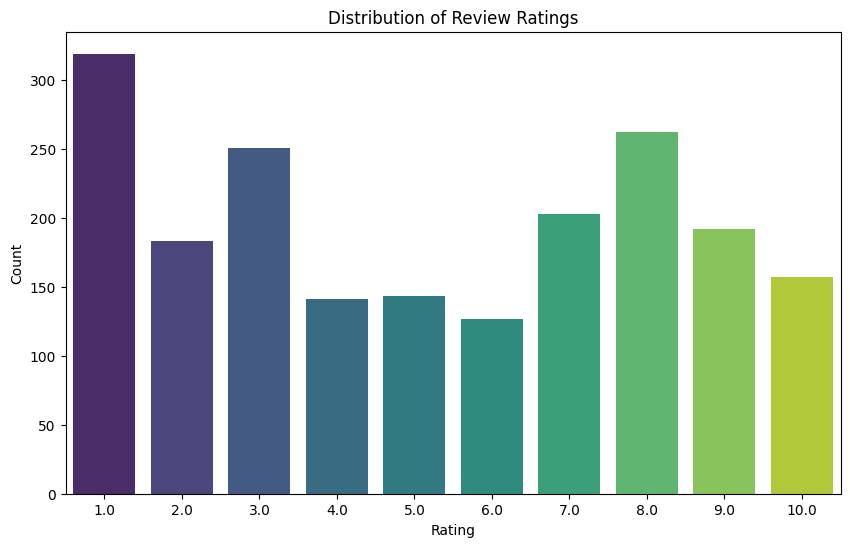


Individual Total Count for Each Rating:
-----------------------------------------
RatingValue
1.0     319
2.0     183
3.0     251
4.0     141
5.0     143
6.0     127
7.0     203
8.0     262
9.0     192
10.0    157
Name: count, dtype: int64

Description of Rating Distribution:
-------------------------------------
count    1978.000000
mean        5.204247
std         3.026396
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: RatingValue, dtype: float64


In [23]:
# Visualisation: Rating Distribution
print("Visualisation: Review Rating Distribution:")
print('------------------------------------------')
plt.figure(figsize=(10, 6))
sns.countplot(x='RatingValue', data=cleaned_df, order=unique_ratings, palette='viridis')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Print Individual Total Count for Each Rating
rating_counts = cleaned_df['RatingValue'].value_counts().sort_index()
print("\nIndividual Total Count for Each Rating:")
print('-----------------------------------------')
print(rating_counts)

# Description of Rating Distribution
rating_description = cleaned_df['RatingValue'].describe()
print("\nDescription of Rating Distribution:")
print('-------------------------------------')
print(rating_description)

In [24]:
# b. Common Ratings
most_common_rating = cleaned_df['RatingValue'].mode().values[0]
infrequent_ratings = cleaned_df['RatingValue'].value_counts().tail(1).index[0]
print(f"Most Common Rating: {most_common_rating}")
print(f"Infrequent Ratings: {infrequent_ratings}")

Most Common Rating: 1.0
Infrequent Ratings: 6.0


#### 3. Average Rating by Seat Type:

In [25]:
# Get unique seat types from the cleaned DataFrame
unique_seat_types = sorted(cleaned_df['Seat Type'].unique())

unique_seat_types

['Business Class', 'Economy Class', 'First Class', 'Premium Economy']

Visualization: Average Ratings by Seat Type:
-------------------------------------------


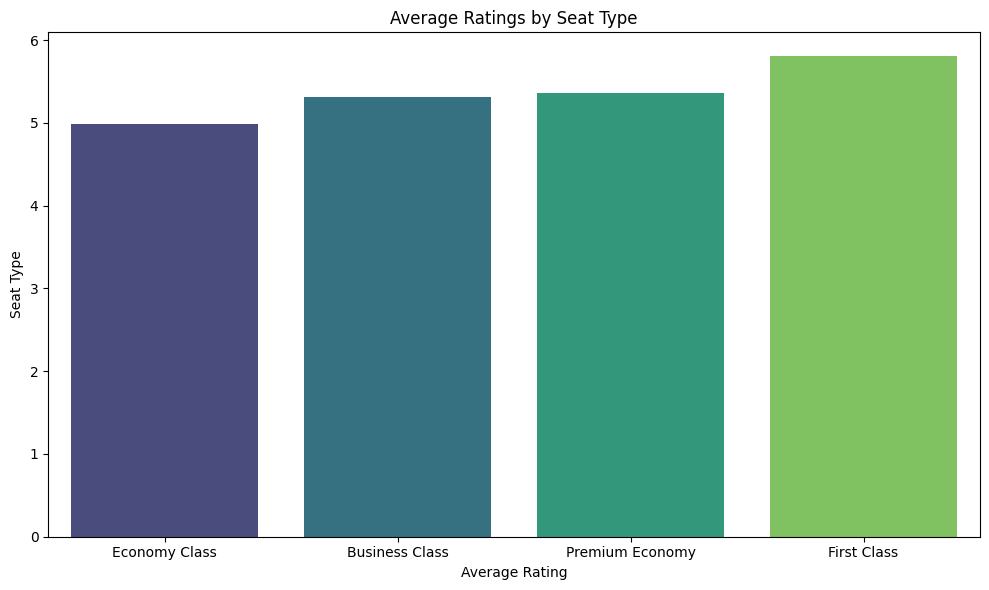


Individual Total Count for Each Seat Type:
-------------------------------------------
Seat Type
Business Class     739
Economy Class      897
First Class        148
Premium Economy    194
Name: count, dtype: int64

Average Ratings by Seat Type:
-------------------------------
Seat Type
First Class        5.804054
Premium Economy    5.365979
Business Class     5.307172
Economy Class      4.985507
Name: RatingValue, dtype: float64


In [26]:
# Visualization: Average Ratings by Seat Type
print("Visualization: Average Ratings by Seat Type:")
print('-------------------------------------------')
plt.figure(figsize=(10, 6))

# Calculate the average rating for each seat type
average_ratings = cleaned_df.groupby('Seat Type')['RatingValue'].mean().reset_index()

# Sort the seat types by ascending average rating
average_ratings.sort_values(by='RatingValue', ascending=True, inplace=True)

# Create the countplot
sns.barplot(x='Seat Type', y='RatingValue', data=average_ratings, palette='viridis')

plt.xlabel('Average Rating')
plt.ylabel('Seat Type')
plt.title('Average Ratings by Seat Type')
plt.tight_layout()

plt.show()

# Print Individual Total Count for Each Seat Type
seat_type_counts = cleaned_df['Seat Type'].value_counts().sort_index()
print("\nIndividual Total Count for Each Seat Type:")
print('-------------------------------------------')
print(seat_type_counts)

# Description of Average Ratings by Seat Type
average_ratings_by_seat = cleaned_df.groupby('Seat Type')['RatingValue'].mean().sort_values(ascending=False)
print("\nAverage Ratings by Seat Type:")
print('-------------------------------')
print(average_ratings_by_seat)

#### 4. Recommended vs. Not Recommended Analysis:


Recommendation Counts:
---------------------
Recommended
no     1060
yes     918
Name: count, dtype: int64


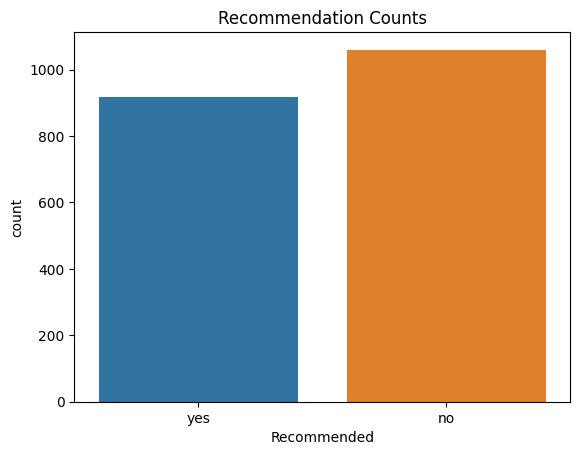

In [27]:
# Get the individual recommendation Counts
recommendation_counts = cleaned_df['Recommended'].value_counts()
print("\nRecommendation Counts:")
print('---------------------')
print(recommendation_counts)

# Visualization
sns.countplot(x='Recommended', data=cleaned_df)
plt.title('Recommendation Counts')
plt.show()

<Figure size 1400x600 with 0 Axes>

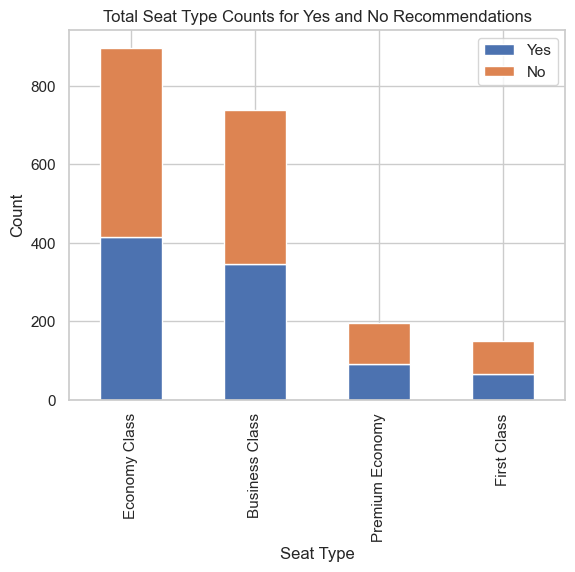

In [28]:
# Assuming 'cleaned_df' is your DataFrame
sns.set(style="whitegrid")

# Filter DataFrame for 'Yes' and 'No' recommendations
yes_reviews = cleaned_df[cleaned_df['Recommended'] == 'yes']
no_reviews = cleaned_df[cleaned_df['Recommended'] == 'no']

# Count the occurrences of each seat type for 'Yes' and 'No' recommendations
yes_counts = yes_reviews['Seat Type'].value_counts()
no_counts = no_reviews['Seat Type'].value_counts()

# Combine counts into a single DataFrame
combined_counts = pd.DataFrame({'Yes': yes_counts, 'No': no_counts}).fillna(0)

# Plotting
plt.figure(figsize=(14, 6))
combined_counts.plot(kind='bar', stacked=True)
plt.title('Total Seat Type Counts for Yes and No Recommendations')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.show()

In [29]:
# Create a cross-tabulation table
table = pd.crosstab(index=yes_reviews['Seat Type'], columns=yes_reviews['Recommended']).merge(
    pd.crosstab(index=no_reviews['Seat Type'], columns=no_reviews['Recommended']), 
    left_index=True, right_index=True, suffixes=('_Yes', '_No'))

# Print the table
print(table)

Recommended      yes   no
Seat Type                
Business Class   346  393
Economy Class    415  482
First Class       66   82
Premium Economy   91  103


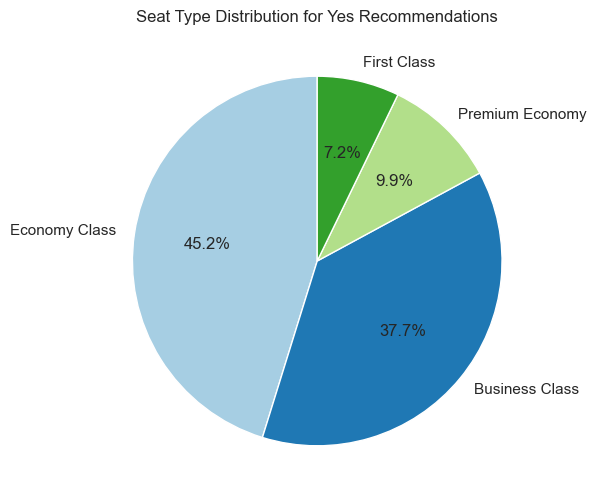

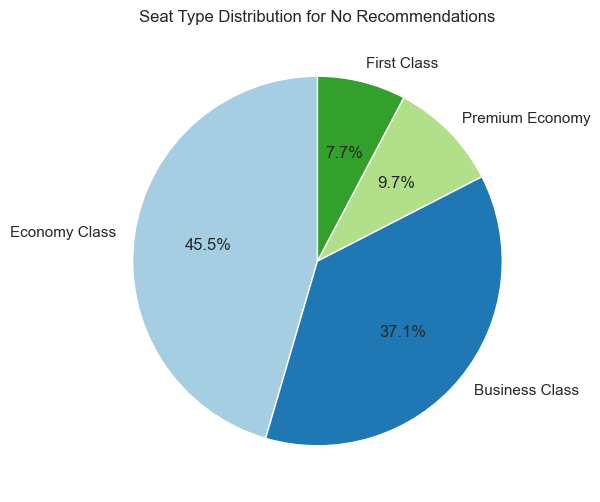

In [30]:
# Plotting Pie Chart for 'Yes'
plt.figure(figsize=(12, 6))
plt.pie(yes_counts, labels=yes_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Seat Type Distribution for Yes Recommendations')
plt.show()

# Plotting Pie Chart for 'No'
plt.figure(figsize=(12, 6))
plt.pie(no_counts, labels=no_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Seat Type Distribution for No Recommendations')
plt.show()


#### 5. Analysis of Ratings over time:

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


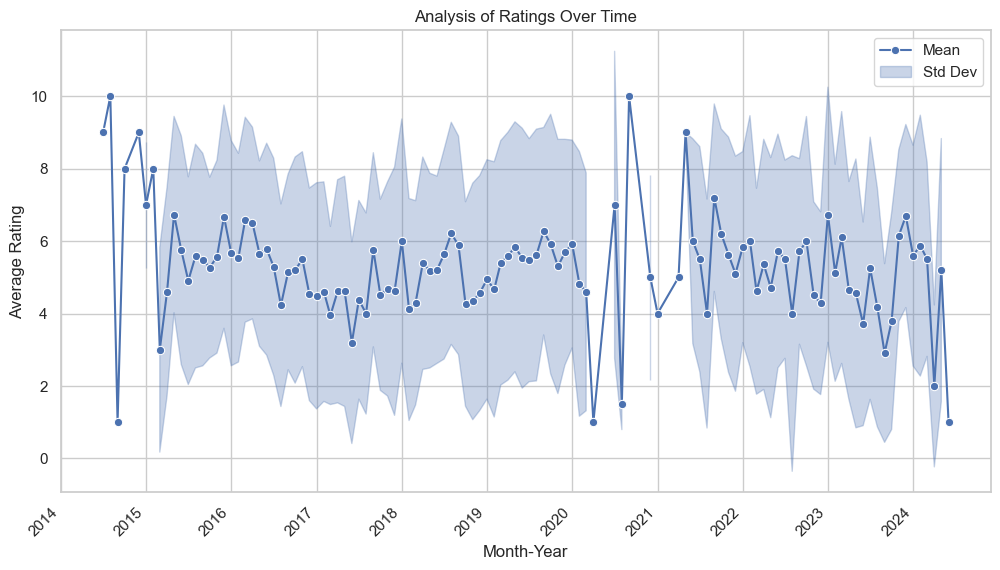


Average Rating Over Time:
--------------------------
<class 'pandas.core.series.Series'>


In [31]:
cleaned_df['MonthYear'] = cleaned_df['Date Flown'].dt.to_timestamp('M').dt.to_period('M')

# Calculate monthly average ratings and standard deviation
monthly_stats = cleaned_df.groupby('MonthYear')['RatingValue'].agg(['mean', 'std'])

# Visualization: Analysis of Ratings Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_stats.index.to_timestamp(), y='mean', data=monthly_stats, marker='o', color='b', label='Mean')
plt.fill_between(monthly_stats.index.to_timestamp(), monthly_stats['mean'] - monthly_stats['std'], monthly_stats['mean'] + monthly_stats['std'], alpha=0.3, color='b', label='Std Dev')
plt.title('Analysis of Ratings Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Removed labels parameter
plt.legend()
plt.show()

# Average rating per monthh and year 
y_values = monthly_stats['mean']
print("\nAverage Rating Over Time:")
print('--------------------------')
print(type(y_values))


#### Topic Modeling

Combined Topic - Business Class: ba, flight, business, class, service, staff, verified, cabin, trip, crew, flight, ba, hours, cancelled, told, later, verified, passengers, staff, luggage, business, class, seat, flight, seats, airways, british, ba, london, service, flight, good, lounge, time, crew, food, club, service, verified, ba, ba, club, seats, flight, new, food, seat, service, british, airways


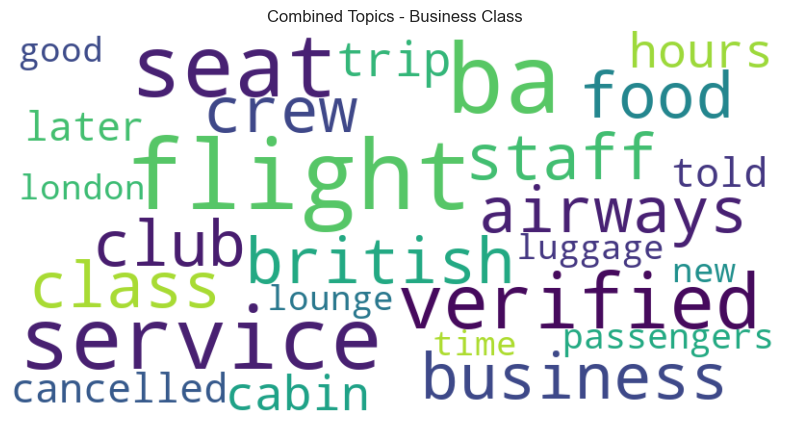

Combined Topic - Economy Class: ba, flight, seat, seats, check, cabin, service, passengers, time, crew, flight, ba, hours, verified, delay, time, london, told, airport, 30, flight, ba, london, british, airways, verified, trip, staff, heathrow, booked, flight, good, crew, time, cabin, service, verified, london, heathrow, food, flight, ba, british, airways, food, service, london, seats, seat, verified


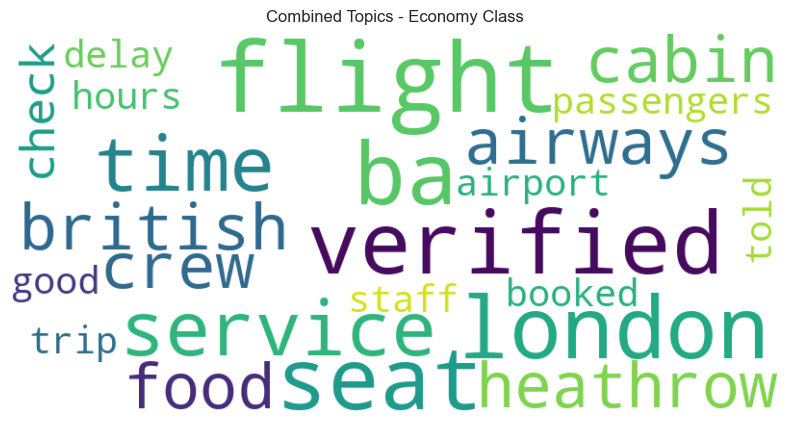

Combined Topic - First Class: ba, class, service, flight, food, seat, trip, staff, passengers, business, ba, flight, class, plane, crew, hours, minutes, later, airways, return, class, flight, service, airways, food, seat, crew, ba, british, business, crew, flight, good, cabin, class, food, service, ba, verified, london, class, flight, ba, new, lounge, airways, 1st, seats, british, seat


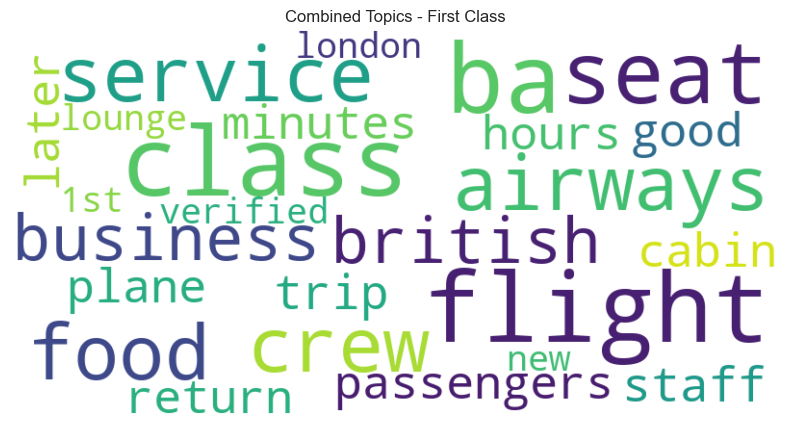

Combined Topic - Premium Economy: flight, ba, seat, economy, cabin, seats, plus, food, world, service, issue, plane, airways, verified, review, british, ba, asked, london, service, flight, ba, airways, british, economy, london, heathrow, verified, premium, seat, flight, service, crew, good, cabin, ba, economy, offered, time, premium, economy, premium, flight, food, good, ba, british, airways, seat, service


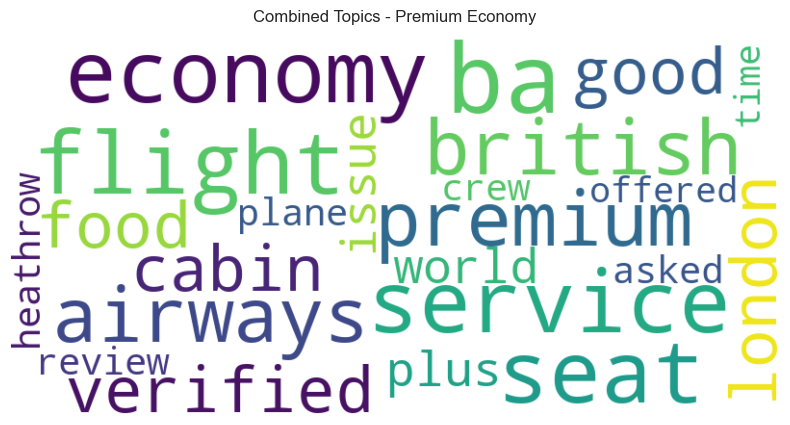

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import pandas as pd

def vectorize_text_data(documents):
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(documents)
    return X, vectorizer

def perform_lda(X):
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(X)
    return lda

def display_combined_wordcloud(lda, vectorizer, seat_type):
    feature_names = vectorizer.get_feature_names_out()
    
    # Combine top words for all topics
    all_top_words = []
    for i in range(1, 6):
        top_words_idx = lda.components_[i - 1].argsort()[:-10-1:-1]
        top_words = [feature_names[idx] for idx in top_words_idx]
        all_top_words.extend(top_words)
    
    combined_topic = f'Combined Topic - {seat_type}: {", ".join(all_top_words)}'
    print(combined_topic)

    generate_and_display_wordcloud(all_top_words, f'Combined Topics - {seat_type}')

def generate_and_display_wordcloud(words, title):
    all_reviews = ' '.join(words)
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(all_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Assuming 'cleaned_df' is your DataFrame with 'ReviewBody' and 'Seat Type' columns
documents = cleaned_df['ReviewBody']
seat_types = cleaned_df['Seat Type'].unique()

# Vectorize the text data
X, vectorizer = vectorize_text_data(documents)

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
lda = perform_lda(X)

# Display the combined word clouds and print combined topics for each seat type
for seat_type in seat_types:
    seat_type_documents = cleaned_df[cleaned_df['Seat Type'] == seat_type]['ReviewBody']
    seat_type_X = vectorizer.transform(seat_type_documents)
    seat_type_lda = perform_lda(seat_type_X)
    
    display_combined_wordcloud(seat_type_lda, vectorizer, seat_type)


#### Sentiment Analysis 

Seat Type
Business Class     0.109849
Economy Class      0.093034
First Class        0.163125
Premium Economy    0.103666
Name: SentimentPolarity, dtype: float64


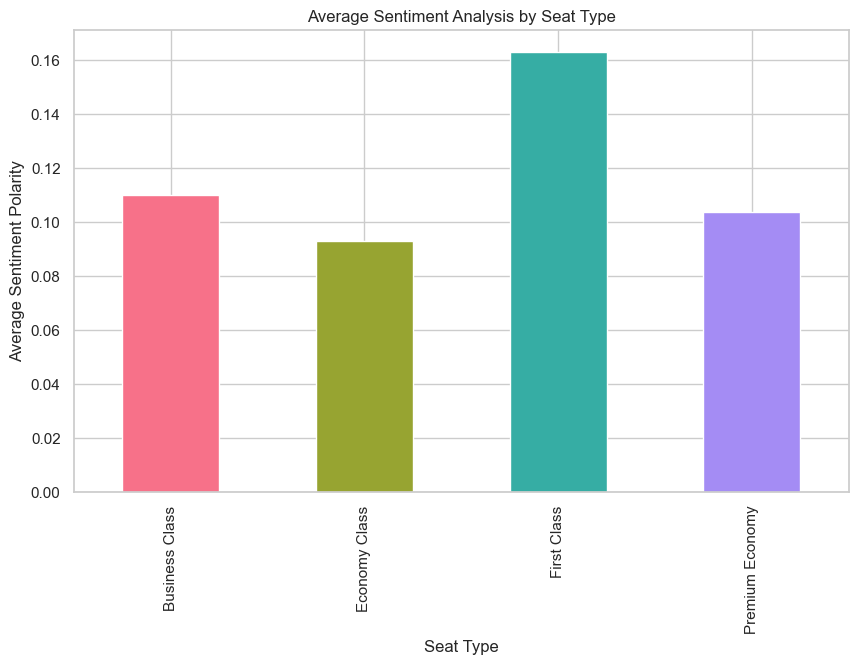

In [33]:
from textblob import TextBlob

# Assuming 'cleaned_df' is your DataFrame with 'ReviewBody' column
reviews = cleaned_df['ReviewBody']

# Calculate sentiment polarity for each review
sentiments = reviews.apply(lambda x: TextBlob(x).sentiment.polarity)

# Add sentiment polarity to the DataFrame
cleaned_df['SentimentPolarity'] = sentiments

# Display average sentiment for each seat type
average_sentiment_by_seat = cleaned_df.groupby('Seat Type')['SentimentPolarity'].mean()
print(average_sentiment_by_seat)

# Define colors for each seat type
colors = sns.color_palette("husl", n_colors=len(average_sentiment_by_seat))


# Plotting
plt.figure(figsize=(10, 6))
average_sentiment_by_seat.plot(kind='bar', color=colors)
plt.title('Average Sentiment Analysis by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Average Sentiment Polarity')
plt.show()


#### Word Clouds

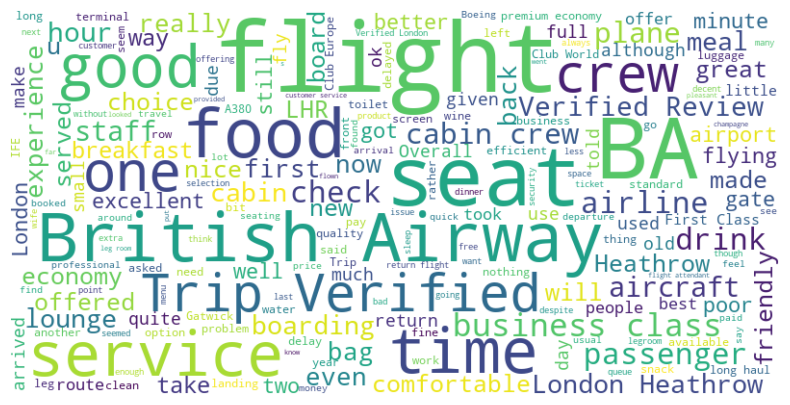

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'cleaned_df' is your DataFrame with 'ReviewBody' column
all_reviews = ' '.join(cleaned_df['ReviewBody'])

# Generate and display a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

flight: 1.0
BA: 0.7504393673110721
seat: 0.6942003514938488
food: 0.4428822495606327
British Airway: 0.43655536028119507
time: 0.37961335676625657
service: 0.3694200351493849
good: 0.33989455184534273
one: 0.2959578207381371
crew: 0.2657293497363796
Trip Verified: 0.2650263620386643
business class: 0.2586994727592267
drink: 0.23268892794376098
passenger: 0.23022847100175747
check: 0.22847100175746923
airline: 0.22425307557117752
plane: 0.21616871704745166
cabin crew: 0.21230228471001758
aircraft: 0.20175746924428822
staff: 0.2014059753954306
hour: 0.1866432337434095
Verified Review: 0.18629173989455183
cabin: 0.17258347978910368
London Heathrow: 0.17258347978910368
meal: 0.1711775043936731
lounge: 0.16520210896309315
boarding: 0.1648506151142355
first: 0.1521968365553603
even: 0.1521968365553603
experience: 0.14727592267135325
bag: 0.1430579964850615
now: 0.14270650263620388
back: 0.14165202108963093
really: 0.140597539543058
LHR: 0.1342706502636204
u: 0.1328646748681898
new: 0.1311072

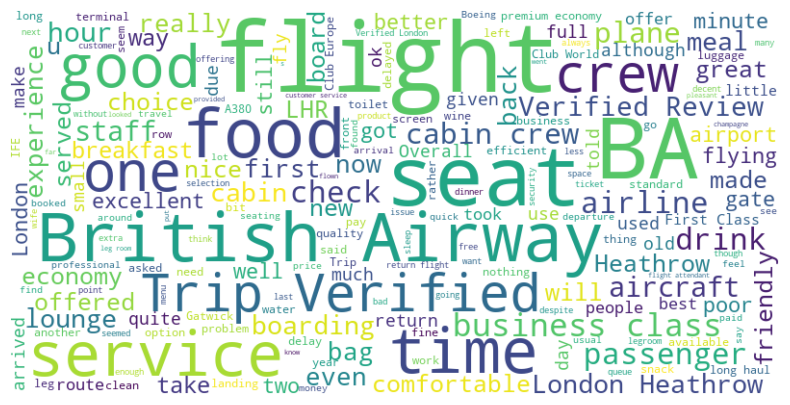

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'cleaned_df' is your DataFrame with 'ReviewBody' column
all_reviews = ' '.join(cleaned_df['ReviewBody'])

# Generate and display a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(all_reviews)

# Access processed text and word frequencies
processed_text = wordcloud.process_text(all_reviews)
word_frequencies = wordcloud.words_

# Print word cloud text and their respective frequencies
for word, freq in word_frequencies.items():
    print(f'{word}: {freq}')

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
